## Lotka Volterra Equations

In [1]:
using LinearAlgebra
# using Plots
using PyCall
using PyPlot
using DataFrames
using CSV
using Symbolics
using Integrals
using DifferentialEquations
# plotlyjs()
matplotlib.use("TkAgg")

#### Defining the RK4 Method Used Here

In [2]:
function RK4(f::Function,xlim,y₀,h)
    xᵢ = xlim[1]:h:xlim[2]
    # print(y₀,'\t',zeros(length(xᵢ)-1,length(y₀)),'\n')
    yᵢ = [transpose(y₀);zeros(length(xᵢ)-1,length(y₀))]
    # print(yᵢ,'\n')

    for (x,y,i) in zip(xᵢ, eachrow(yᵢ),2:length(xᵢ))
        # print(x,' ',y,'\n')
        
            k₁ = h*f(x,y)
            k₂ = h*f(x+h/2,y+k₁/2)
            k₃ = h*f(x+h/2,y+k₂/2)
            k₄ = h*f(x+h,y+k₃)

            yᵢ[i,:] = y + (k₁+2k₂+2k₃+k₄)/6
    end
    
    return yᵢ
end


RK4 (generic function with 1 method)

### Defining the Lotka Volterra Equations
1. `x` is the prey population
2. `y` is the predator population
3. `a` is the Prey growth rate
4. $\beta$ is the Predation rate coefficient
5. $\delta$ is the Predator reproduction rate coefficient 
6. `y` is the Predator death rate 

In [3]:
function x′(x,y;α=0.1,β=0.02)
    α*x - β*x*y
end

function y′(x,y;δ=0.01,γ=0.1)
    δ*x*y - γ*y
end

function xy(t,xy)
    x,y=xy
    [x′(x,y),y′(x,y)]
end


xy (generic function with 1 method)

### Simulating Predator Prey

In [18]:
h=0.1
tlim = [0,500]
y₀ = [40,10]
Y= RK4(xy,tlim,y₀,h);

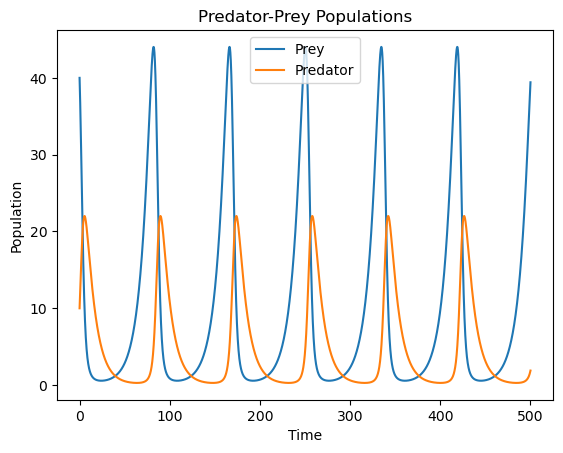

In [19]:
plt.close("all")
title("Predator-Prey Populations")
xlabel("Time")
ylabel("Population")
plt.plot(tlim[1]:h:tlim[2],Y[:,1])
plt.plot(tlim[1]:h:tlim[2],Y[:,2])
legend(["Prey","Predator"])
gcf()

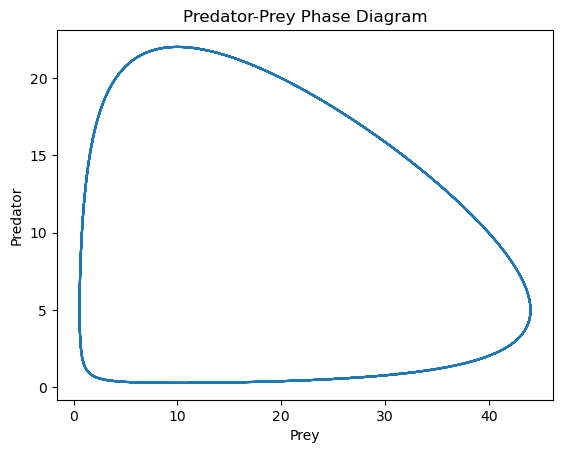

In [20]:
plt.close("all")
title("Predator-Prey Phase Diagram")
xlabel("Prey")
ylabel("Predator")
plt.plot(Y[:,1],Y[:,2])
gcf()